# **Context**

The City of Paris has installed **permanent bicycle counters** to monitor the evolution of cycling activity. This data helps assess traffic volume at various locations throughout the city and identify the most frequently used routes.

# **Objective**
- Analyze the open data from bicycle counters.
- Visualize **peak hours and high-traffic areas** to support the city in prioritizing cycling infrastructure improvements.

# **Data Used**
- **Source:** [OpenData Paris 2024](https://opendata.paris.fr/api/datasets/1.0/comptage-velo-historique-donnees-compteurs/attachments/2024_comptage_velo_donnees_sites_comptage_zip/)
- **Size:** ~2 GB
- **Content:** Historical records of bicycle counts by counter, including location, timestamp, and more.

# **Methodology**
1. **Data Cleaning and Preparation**  
   Format unification, handling of missing values, and filtering of relevant columns.

2. **Temporal Analysis**  
   Study of usage patterns by hour, day, and season to detect trends and anomalies.

3. **Mapping Traffic Hotspots**  
   Geospatial analysis to identify the most trafficked zones and routes.

4. **Infrastructure Recommendations**  
   Insights and suggestions based on the analysis to guide urban planning and cycling infrastructure improvements.

# **Tools**
- **Python** (data processing and analysis)
- **Streamlit** (interactive dashboard and visualization)


### **Step 1: Loading and Previewing the Dataset**

The first step of this project involves loading the dataset provided by the City of Paris. This dataset comes from automatic bicycle counters installed at various locations throughout the city. These counters record the **number of bicycles counted per hour**, along with additional information such as location, date, and other metadata.

#### **Loading the File**

In [1]:
import pandas as pd

# Loading the file
df = pd.read_csv("../data/comptage-velo-donnees-compteurs.csv", sep=";")
df.head()

,Identifiant du compteur,Nom du compteur,Identifiant du site de comptage,Nom du site de comptage,Comptage horaire,Date et heure de comptage,Date d'installation du site de comptage,Lien vers photo du site de comptage,Coordonnées géographiques,Identifiant technique compteur,ID Photos,test_lien_vers_photos_du_site_de_comptage_,id_photo_1,url_sites,type_dimage,mois_annee_comptage
0,100003098-101003098,106 avenue Denfert Rochereau NE-SO,100003098.0,106 avenue Denfert Rochereau,0,2024-04-01T05:00:00+02:00,2012-02-22,https://filer.eco-counter-tools.com/file/09/73...,"48.83507,2.33305",Y2H20114504,https://filer.eco-counter-tools.com/file/09/73...,https://filer.eco-counter-tools.com/file/09/73...,https:,https://www.eco-visio.net/Photos/100003098,jpg,2024-04
1,100003098-101003098,106 avenue Denfert Rochereau NE-SO,100003098.0,106 avenue Denfert Rochereau,0,2024-04-01T06:00:00+02:00,2012-02-22,https://filer.eco-counter-tools.com/file/09/73...,"48.83507,2.33305",Y2H20114504,https://filer.eco-counter-tools.com/file/09/73...,https://filer.eco-counter-tools.com/file/09/73...,https:,https://www.eco-visio.net/Photos/100003098,jpg,2024-04
2,100003098-101003098,106 avenue Denfert Rochereau NE-SO,100003098.0,106 avenue Denfert Rochereau,0,2024-04-01T07:00:00+02:00,2012-02-22,https://filer.eco-counter-tools.com/file/09/73...,"48.83507,2.33305",Y2H20114504,https://filer.eco-counter-tools.com/file/09/73...,https://filer.eco-counter-tools.com/file/09/73...,https:,https://www.eco-visio.net/Photos/100003098,jpg,2024-04
3,100003098-101003098,106 avenue Denfert Rochereau NE-SO,100003098.0,106 avenue Denfert Rochereau,0,2024-04-01T11:00:00+02:00,2012-02-22,https://filer.eco-counter-tools.com/file/09/73...,"48.83507,2.33305",Y2H20114504,https://filer.eco-counter-tools.com/file/09/73...,https://filer.eco-counter-tools.com/file/09/73...,https:,https://www.eco-visio.net/Photos/100003098,jpg,2024-04
4,100003098-101003098,106 avenue Denfert Rochereau NE-SO,100003098.0,106 avenue Denfert Rochereau,0,2024-04-01T08:00:00+02:00,2012-02-22,https://filer.eco-counter-tools.com/file/09/73...,"48.83507,2.33305",Y2H20114504,https://filer.eco-counter-tools.com/file/09/73...,https://filer.eco-counter-tools.com/file/09/73...,https:,https://www.eco-visio.net/Photos/100003098,jpg,2024-04


In [8]:
# Size of the initial dataset
df.shape

(948263, 16)

### **Step 2: Initial Cleaning and Preparation of Temporal Data**

In this section, we perform an initial cleaning of the dataset to make it suitable for future analysis.

#### **Objectives:**
- Remove trailing and leading spaces from column names.
- Convert the **"Date et heure de comptage"** column to `datetime` format.
- Extract new time-related variables that will be useful for temporal analysis:
  - **Hour of the count**
  - **Day of the month**
  - **Month**
  - **Year**
  - **Day of the week** (weekday name)
- Prepare the **geographic coordinates** column for later use in mapping.

In [2]:
# Remove spaces and standardize column names
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# Convert to datetime with timezone handling (UTC+2 for Paris)
df['date_et_heure_de_comptage'] = pd.to_datetime(df['date_et_heure_de_comptage'], utc=True).dt.tz_convert('Europe/Paris')

# Extract temporal features
df['heure'] = df['date_et_heure_de_comptage'].dt.hour
df['jour_mois'] = df['date_et_heure_de_comptage'].dt.day
df['mois'] = df['date_et_heure_de_comptage'].dt.month
df['annee'] = df['date_et_heure_de_comptage'].dt.year
df['jour_semaine'] = df['date_et_heure_de_comptage'].dt.day_name()

# Split latitude/longitude (assuming the format "lat, long")
df[['latitude', 'longitude']] = df['coordonnées_géographiques'].str.split(',', expand=True).astype(float)

In [3]:
# Number of rows with invalid dates
print("Invalid dates:", df['date_et_heure_de_comptage'].isna().sum())

Invalid dates: 0


In [11]:
# Display
df.head()

,identifiant_du_compteur,nom_du_compteur,identifiant_du_site_de_comptage,nom_du_site_de_comptage,comptage_horaire,date_et_heure_de_comptage,date_d'installation_du_site_de_comptage,lien_vers_photo_du_site_de_comptage,coordonnées_géographiques,identifiant_technique_compteur,...,url_sites,type_dimage,mois_annee_comptage,heure,jour_mois,mois,annee,jour_semaine,latitude,longitude
0,100003098-101003098,106 avenue Denfert Rochereau NE-SO,100003098.0,106 avenue Denfert Rochereau,0,2024-04-01 05:00:00+02:00,2012-02-22,https://filer.eco-counter-tools.com/file/09/73...,"48.83507,2.33305",Y2H20114504,...,https://www.eco-visio.net/Photos/100003098,jpg,2024-04,5,1,4,2024,Monday,48.83507,2.33305
1,100003098-101003098,106 avenue Denfert Rochereau NE-SO,100003098.0,106 avenue Denfert Rochereau,0,2024-04-01 06:00:00+02:00,2012-02-22,https://filer.eco-counter-tools.com/file/09/73...,"48.83507,2.33305",Y2H20114504,...,https://www.eco-visio.net/Photos/100003098,jpg,2024-04,6,1,4,2024,Monday,48.83507,2.33305
2,100003098-101003098,106 avenue Denfert Rochereau NE-SO,100003098.0,106 avenue Denfert Rochereau,0,2024-04-01 07:00:00+02:00,2012-02-22,https://filer.eco-counter-tools.com/file/09/73...,"48.83507,2.33305",Y2H20114504,...,https://www.eco-visio.net/Photos/100003098,jpg,2024-04,7,1,4,2024,Monday,48.83507,2.33305
3,100003098-101003098,106 avenue Denfert Rochereau NE-SO,100003098.0,106 avenue Denfert Rochereau,0,2024-04-01 11:00:00+02:00,2012-02-22,https://filer.eco-counter-tools.com/file/09/73...,"48.83507,2.33305",Y2H20114504,...,https://www.eco-visio.net/Photos/100003098,jpg,2024-04,11,1,4,2024,Monday,48.83507,2.33305
4,100003098-101003098,106 avenue Denfert Rochereau NE-SO,100003098.0,106 avenue Denfert Rochereau,0,2024-04-01 08:00:00+02:00,2012-02-22,https://filer.eco-counter-tools.com/file/09/73...,"48.83507,2.33305",Y2H20114504,...,https://www.eco-visio.net/Photos/100003098,jpg,2024-04,8,1,4,2024,Monday,48.83507,2.33305


Here are the **non-essential columns** we will remove to lighten the dataset and reduce noise:

- **Redundant columns:**
  - `nom_du_compteur`  
  - `mois_annee_comptage` (already covered by `mois` + `annee`)
  - `identifiant_du_site_de_comptage` (similar to `identifiant_du_compteur`)
  - `nom_du_site_de_comptage` (nearly identical to `nom_du_compteur`)

- **Technical/metadata columns not useful for analysis:**
  - `date_dinstallation_du_site_de_comptage`
  - `lien_vers_photo_du_site_de_comptage` (photos not available, not relevant for the analysis)
  - `identifiant_technique_compteur` (internal ID)
  - `id_photos`, `test_lien_vers_photos_du_site_de_comptage_`, `id_photo_1`, `url_sites`, `type_dimage` (all related to photos, not useful for analysis)

- **Columns already processed:**
  - `coordonnées_géographiques` (already split into `latitude` and `longitude`)


In [4]:
colonnes_a_supprimer = [
    'mois_annee_comptage', 'identifiant_du_site_de_comptage', 'identifiant_du_compteur',
    'nom_du_site_de_comptage', 'lien_vers_photo_du_site_de_comptage',
    'identifiant_technique_compteur', 'id_photos',  'date_d\'installation_du_site_de_comptage',
    'test_lien_vers_photos_du_site_de_comptage_', 'id_photo_1',
    'url_sites', 'type_dimage', 'coordonnées_géographiques'
]

df_clean = df.drop(columns=colonnes_a_supprimer)

In [5]:
df_clean.columns

Index(['nom_du_compteur', 'comptage_horaire', 'date_et_heure_de_comptage',
       'heure', 'jour_mois', 'mois', 'annee', 'jour_semaine', 'latitude',
       'longitude'],
      dtype='object')

In [14]:
print(df_clean.isnull().sum())

nom_du_compteur                  0
comptage_horaire                 0
date_et_heure_de_comptage        0
heure                            0
jour_mois                        0
mois                             0
annee                            0
jour_semaine                     0
latitude                     35302
longitude                    35302
dtype: int64


In [6]:
df_clean = df_clean.dropna(subset=['latitude', 'longitude'])

In [7]:
print(df_clean.isnull().sum())
print("Taille après nettoyage:", len(df_clean))

nom_du_compteur              0
comptage_horaire             0
date_et_heure_de_comptage    0
heure                        0
jour_mois                    0
mois                         0
annee                        0
jour_semaine                 0
latitude                     0
longitude                    0
dtype: int64
Taille après nettoyage: 912961


In [8]:
print(df_clean.nunique())

nom_du_compteur                97
comptage_horaire             1230
date_et_heure_de_comptage    9882
heure                          24
jour_mois                      31
mois                           12
annee                           2
jour_semaine                    7
latitude                       68
longitude                      69
dtype: int64


### **Cleaning Results**

- The column `Date et heure de comptage` was successfully converted to `datetime` format, taking into account the `Europe/Paris` timezone.
- No missing values (`NaT`) were detected after the conversion.

#### **Removed Columns**

The following columns were removed as they were redundant, technical, or irrelevant for the analysis:
- `Identifiant du compteur`, `Identifiant du site de comptage`, `Nom du site de comptage`, `mois_annee_comptage`
- `Coordonnées géographiques` (replaced by `Latitude` and `Longitude`)
- All columns related to photo metadata and external links

#### **Missing Values**

- **35,302 rows** with missing GPS coordinates were removed.
- **Final dataset size:** **912,961 rows**

The dataset is now clean, structured, and ready for the **feature engineering** phase.


In [9]:
# Convert repetitive text columns to 'category' type:
# Ideal for columns with a small number of unique values to save memory
categorical_columns = ['nom_du_compteur', 'jour_semaine']
df_clean[categorical_columns] = df_clean[categorical_columns].astype('category')

# Downcast float columns (geographic coordinates):
# float32 is precise enough for GPS coordinates (meter-level precision)
df_clean['latitude'] = df_clean['latitude'].astype('float32')
df_clean['longitude'] = df_clean['longitude'].astype('float32')

### **Exploratory Statistical Analysis**

In [10]:
# Global statistics on hourly bicycle counts
print("Overall statistics:")
print(df_clean['comptage_horaire'].describe())

# Average number of bicycles per weekday
print("\nAverage count by day of the week:")
print(df_clean.groupby('jour_semaine')['comptage_horaire'].mean().sort_values(ascending=False))

Overall statistics:
count    912961.000000
mean         76.184461
std         103.661389
min           0.000000
25%          11.000000
50%          42.000000
75%          96.000000
max        3070.000000
Name: comptage_horaire, dtype: float64

Average count by day of the week:
jour_semaine
Tuesday      88.290220
Thursday     86.096789
Wednesday    84.869425
Monday       79.957816
Friday       78.704130
Saturday     61.274143
Sunday       53.749440
Name: comptage_horaire, dtype: float64


C:\Users\ibtih\AppData\Local\Temp\ipykernel_6812\3619398424.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_clean.groupby('jour_semaine')['comptage_horaire'].mean().sort_values(ascending=False))


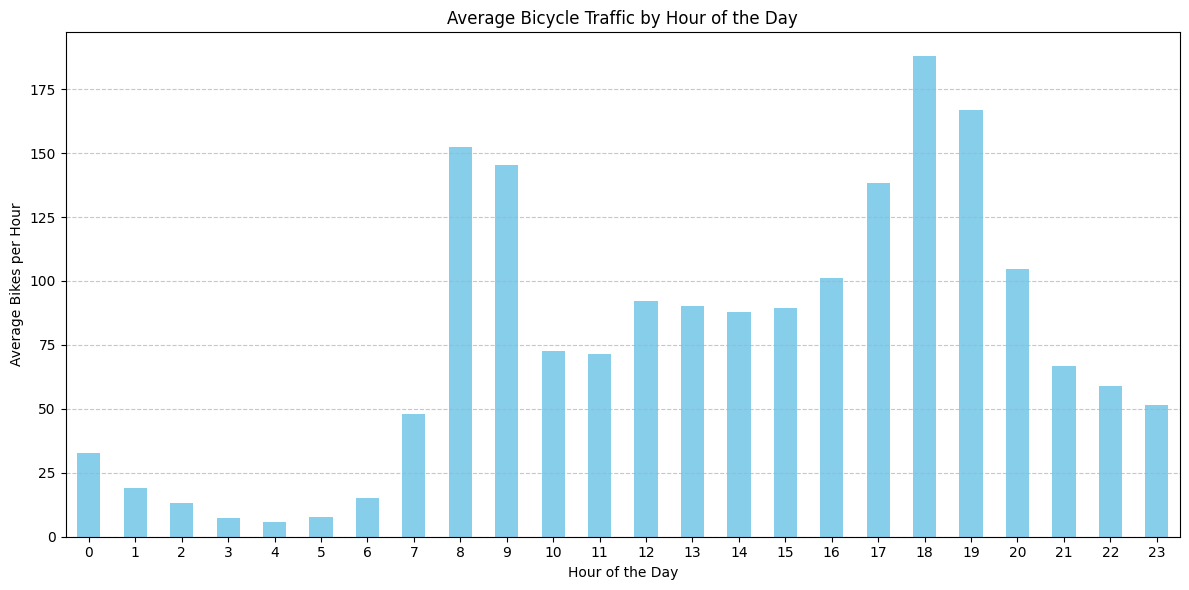

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Average bicycle traffic by hour of the day
plt.figure(figsize=(12, 6))
df_clean.groupby('heure')['comptage_horaire'].mean().plot(kind='bar', color='skyblue')

plt.title("Average Bicycle Traffic by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Bikes per Hour")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\ibtih\AppData\Local\Temp\ipykernel_15328\3573694115.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_compteurs = df_clean.groupby('nom_du_compteur')['comptage_horaire'].sum().nlargest(10)


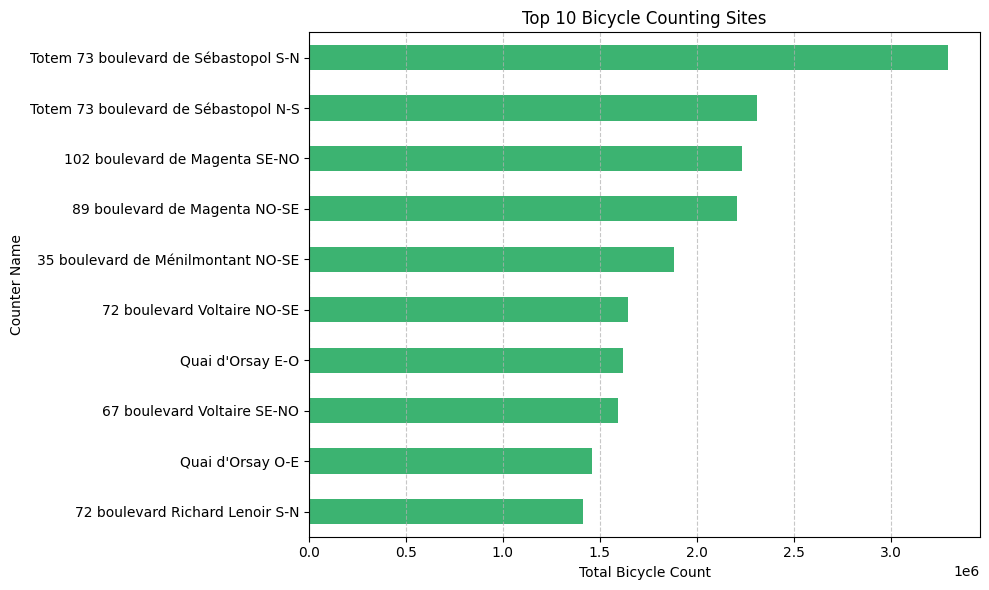

In [22]:
# Top 10 counters by total bicycle volume
top_compteurs = df_clean.groupby('nom_du_compteur')['comptage_horaire'].sum().nlargest(10)

top_compteurs.plot(kind='barh', figsize=(10, 6), color='mediumseagreen')
plt.title("Top 10 Bicycle Counting Sites")
plt.xlabel("Total Bicycle Count")
plt.ylabel("Counter Name")
plt.gca().invert_yaxis()  # Highest at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [23]:
import folium
from folium.plugins import HeatMap

# 1. Create a base map centered on Paris
paris_map = folium.Map(location=[48.8566, 2.3522], zoom_start=13)

# 2. Add a heatmap (based on a random sample for performance)
heat_data = df_clean[['latitude', 'longitude', 'comptage_horaire']].sample(5000).values.tolist()
HeatMap(heat_data, radius=15, blur=10).add_to(paris_map)

# 3. Add markers for the top 10 bicycle counters
for nom in top_compteurs.index:
    # Get the coordinates of the first occurrence for this counter
    coord = df_clean[df_clean['nom_du_compteur'] == nom][['latitude', 'longitude']].iloc[0]
    folium.Marker(
        location=[coord['latitude'], coord['longitude']],
        tooltip=f"{nom}: {top_compteurs[nom]:,.0f} counts",
        icon=folium.Icon(color='red')
    ).add_to(paris_map)

# 4. Display the map
paris_map


In [24]:
from folium.plugins import HeatMapWithTime
from IPython.display import display

# 1. Prepare time string for grouping (format: 'YYYY-MM-DD HH:MM')
df_clean['timestamp_str'] = df_clean['date_et_heure_de_comptage'].dt.strftime('%Y-%m-%d %H:%M')

# Create a sorted list of unique timestamps
time_index = sorted(df_clean['timestamp_str'].unique())

# Prepare heatmap data for each timestamp (limited to 100 steps for performance)
heat_data = []
for time in time_index[:100]:
    frame_data = df_clean[df_clean['timestamp_str'] == time]
    heat_data.append(frame_data[['latitude', 'longitude', 'comptage_horaire']].values.tolist())

# 2. Create a dark-themed base map centered on Paris
m = folium.Map(location=[48.8566, 2.3522], zoom_start=13, tiles='CartoDB dark_matter')

# 3. Add animated heatmap
HeatMapWithTime(
    heat_data,
    index=time_index[:100],
    radius=15,
    gradient={0.2: 'blue', 0.5: 'lime', 1: 'red'},
    min_opacity=0.5,
    max_opacity=0.8,
    use_local_extrema=True
).add_to(m)

# 4. Display the map (Jupyter Notebook only)
display(m)


In [12]:
# Group by counter and timestamp, then pivot to create a time series:
# Each column is a counter, each row a timestamp, values are mean hourly counts
df_time_series = df_clean.groupby(['nom_du_compteur', 'date_et_heure_de_comptage'])['comptage_horaire'] \
                         .mean().unstack(level=0)


C:\Users\ibtih\AppData\Local\Temp\ipykernel_6812\3690765854.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_time_series = df_clean.groupby(['nom_du_compteur', 'date_et_heure_de_comptage'])['comptage_horaire'] \


In [13]:
# Compute the absolute peak datetime for each counter
# This returns the timestamp when each counter had its highest recorded traffic
peak_times = df_time_series.idxmax()


In [14]:
# Create a summary DataFrame of traffic peaks per counter
analyse_pics = pd.DataFrame({
    'Counter': peak_times.index,
    'Peak_Time': peak_times.values,
    'Max_Traffic': df_time_series.max().values
}).sort_values('Max_Traffic', ascending=False)

# Format datetime for readability
analyse_pics['Peak_Time'] = analyse_pics['Peak_Time'].dt.strftime('%Y-%m-%d %H:%M')

# Display top 10 peak traffic moments
print("\nTop 10 peak traffic moments:")
print(analyse_pics.head(10))



Top 10 peak traffic moments:
                                 Counter         Peak_Time  Max_Traffic
84                      Quai d'Orsay O-E  2025-01-05 14:00       3070.0
90  Totem 73 boulevard de Sébastopol S-N  2024-09-18 17:00       1477.0
83                      Quai d'Orsay E-O  2024-06-04 07:00       1429.0
5                 132 rue Lecourbe NE-SO  2024-12-13 17:00       1227.0
88            Totem 64 Rue de Rivoli O-E  2025-04-29 17:00       1221.0
94              Totem Cours la Reine O-E  2024-11-25 05:00       1035.0
89  Totem 73 boulevard de Sébastopol N-S  2024-06-25 07:00        980.0
21         27 quai de la Tournelle SE-NO  2024-06-25 06:00        962.0
87            Totem 64 Rue de Rivoli E-O  2025-04-02 07:00        925.0
2         102 boulevard de Magenta SE-NO  2024-09-17 16:00        917.0


In [30]:
import plotly.express as px

# Bar chart of the top 20 highest traffic peaks across counters
fig = px.bar(
    analyse_pics.head(20),
    x='Counter',
    y='Max_Traffic',
    hover_data=['Peak_Time'],
    color='Max_Traffic',
    title='<b>Top 20 Bicycle Traffic Peaks</b>',
    labels={
        'Max_Traffic': 'Bikes/hour',
        'Peak_Time': 'Peak Time'
    },
    height=500
)

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Display the interactive chart
fig.show()


C:\Users\ibtih\AppData\Local\Temp\ipykernel_15328\824485091.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



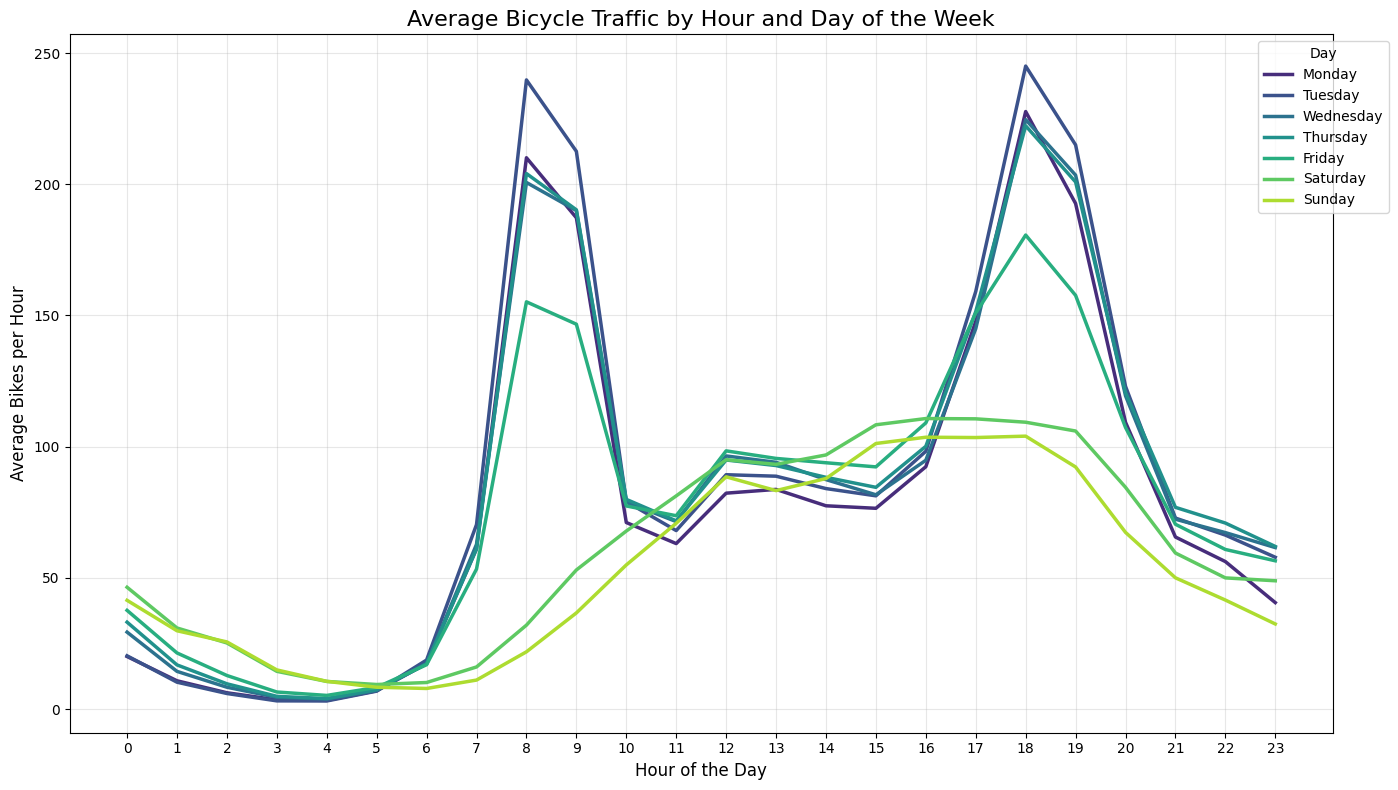

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data: average hourly traffic grouped by day of the week
df_jour = df_clean.groupby(['jour_semaine', 'heure'])['comptage_horaire'].mean().reset_index()

# Ensure the days are in logical order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot average traffic per hour for each day of the week
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=df_jour,
    x='heure',
    y='comptage_horaire',
    hue='jour_semaine',
    hue_order=day_order,
    palette='viridis',
    linewidth=2.5
)

plt.title('Average Bicycle Traffic by Hour and Day of the Week', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Bikes per Hour', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(alpha=0.3)
plt.legend(title='Day', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## **Machine Learning**

In [32]:
df_clean.head()

,nom_du_compteur,comptage_horaire,date_et_heure_de_comptage,heure,jour_mois,mois,annee,jour_semaine,latitude,longitude,timestamp_str
0,106 avenue Denfert Rochereau NE-SO,0,2024-04-01 05:00:00+02:00,5,1,4,2024,Monday,48.835072,2.33305,2024-04-01 05:00
1,106 avenue Denfert Rochereau NE-SO,0,2024-04-01 06:00:00+02:00,6,1,4,2024,Monday,48.835072,2.33305,2024-04-01 06:00
2,106 avenue Denfert Rochereau NE-SO,0,2024-04-01 07:00:00+02:00,7,1,4,2024,Monday,48.835072,2.33305,2024-04-01 07:00
3,106 avenue Denfert Rochereau NE-SO,0,2024-04-01 11:00:00+02:00,11,1,4,2024,Monday,48.835072,2.33305,2024-04-01 11:00
4,106 avenue Denfert Rochereau NE-SO,0,2024-04-01 08:00:00+02:00,8,1,4,2024,Monday,48.835072,2.33305,2024-04-01 08:00


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Define features and target
X = df_clean[['heure', 'jour_semaine', 'mois', 'latitude', 'longitude']]
y = df_clean['comptage_horaire']

# Encode the categorical feature (day of the week)
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[['jour_semaine']]).toarray()

# Combine numerical and encoded categorical features
X_final = np.hstack([
    X[['heure', 'mois', 'latitude', 'longitude']].values,
    X_encoded
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)


In [35]:
# -------------------------------
#  MODEL TRAINING
# -------------------------------

# 1) LINEAR REGRESSION (BASELINE)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
predictions = lr.predict(X_test)

# Evaluate performance
print("=== Linear Regression (Baseline) ===")
print(f"MAE: {mean_absolute_error(y_test, predictions):.1f} bikes/hour")  # Mean Absolute Error
print(f"R²: {r2_score(y_test, predictions):.2f}")  # Explained variance (coefficient of determination)
print("\n")


=== Linear Regression (Baseline) ===
MAE: 61.0 bikes/hour
R²: 0.13




--- **Poor Performance: Linear Regression**

- **R² = 0.13** → The model explains only **13% of the variance** in the data.
- **MAE = 61 bikes/hour** → On average, predictions are off by **61 bikes** each hour.

### Likely Cause:
- The relationship between features and the target variable is **non-linear**.
  - For example: the effect of **hour** on traffic is **not linear** (traffic spikes during rush hours, drops at night).
- → Solution : Use models that can **capture non-linear patterns**.

In [36]:
# 2) RANDOM FOREST (IMPROVEMENT)
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf = RandomForestRegressor(
    n_estimators=100,   # Number of trees in the forest
    random_state=42     # Ensures reproducibility
)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf.predict(X_test)

# Evaluate the model
print("=== Random Forest ===")
print(f"MAE: {mean_absolute_error(y_test, rf_predictions):.1f} bikes/hour")
print(f"R²: {r2_score(y_test, rf_predictions):.2f}")
print("\n")


=== Random Forest ===
MAE: 23.5 bikes/hour
R²: 0.80




In [37]:
# 3) XGBOOST (OPTIMIZED ALTERNATIVE)
from xgboost import XGBRegressor

# Initialize the XGBoost Regressor
xgb = XGBRegressor(
    objective='reg:squarederror',  # Loss function for regression
    n_estimators=100,              # Number of boosting rounds
    random_state=42                # Reproducibility
)

# Train the model
xgb.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb.predict(X_test)

# Evaluate the model
print("=== XGBoost ===")
print(f"MAE: {mean_absolute_error(y_test, xgb_predictions):.1f} bikes/hour")
print(f"R²: {r2_score(y_test, xgb_predictions):.2f}")


=== XGBoost ===
MAE: 24.5 bikes/hour
R²: 0.81


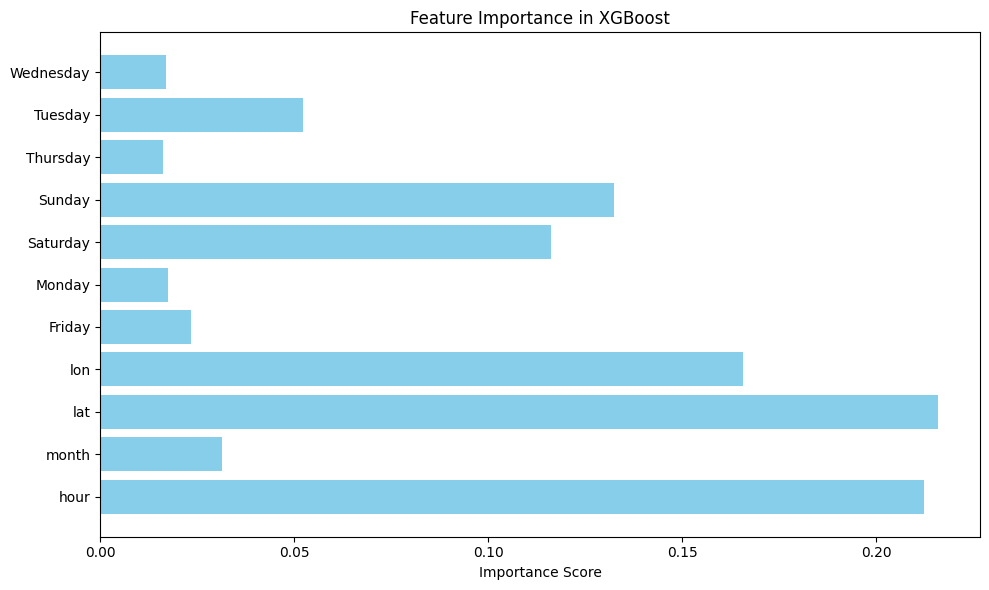

In [38]:
# ANALYSIS OF RESULTS

import matplotlib.pyplot as plt

# Plot feature importance (XGBoost)
plt.figure(figsize=(10, 6))
plt.barh(
    range(len(xgb.feature_importances_)),
    xgb.feature_importances_,
    color='skyblue'
)

# Feature names: hour, month, coordinates, and one-hot encoded weekdays
feature_names = ['hour', 'month', 'lat', 'lon'] + list(encoder.categories_[0])
plt.yticks(range(len(feature_names)), feature_names)
plt.title('Feature Importance in XGBoost')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


--- Random Forest vs XGBoost

- Similar performance:

  - Random Forest slightly better in MAE (23.5 vs 24.5)

  - XGBoost very slightly better in R² (0.81 vs 0.80)

- Model choice:  
We choose Random Forest for its lower MAE, greater stability, and ease of use (fewer hyperparameters to tune).


Text(0.5, 1.0, 'Distribution des Erreurs (Random Forest)')

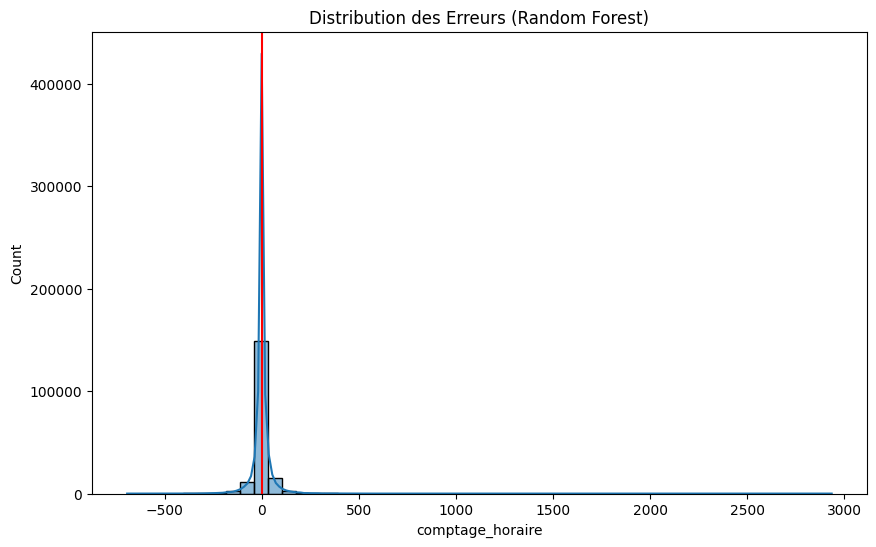

In [ ]:
# Residual Analysis (Random Forest)
residus = y_test - rf_predictions
plt.figure(figsize=(10, 6))
sns.histplot(residus, bins=50, kde=True)
plt.axvline(x=0, color='r')
plt.title('Error Distribution (Random Forest)')

Normal distribution centered around 0 → Good generalization.

In [17]:
# Group by counter and datetime (hourly average)

df_time_series = df_clean.groupby(['nom_du_compteur', 'date_et_heure_de_comptage'])['comptage_horaire'].mean().unstack(level=0)

C:\Users\ibtih\AppData\Local\Temp\ipykernel_6812\3173219860.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_time_series = df_clean.groupby(['nom_du_compteur', 'date_et_heure_de_comptage'])['comptage_horaire'].mean().unstack(level=0)


C:\Users\ibtih\AppData\Local\Temp\ipykernel_6812\1244977444.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby("nom_du_compteur")["comptage_horaire"]


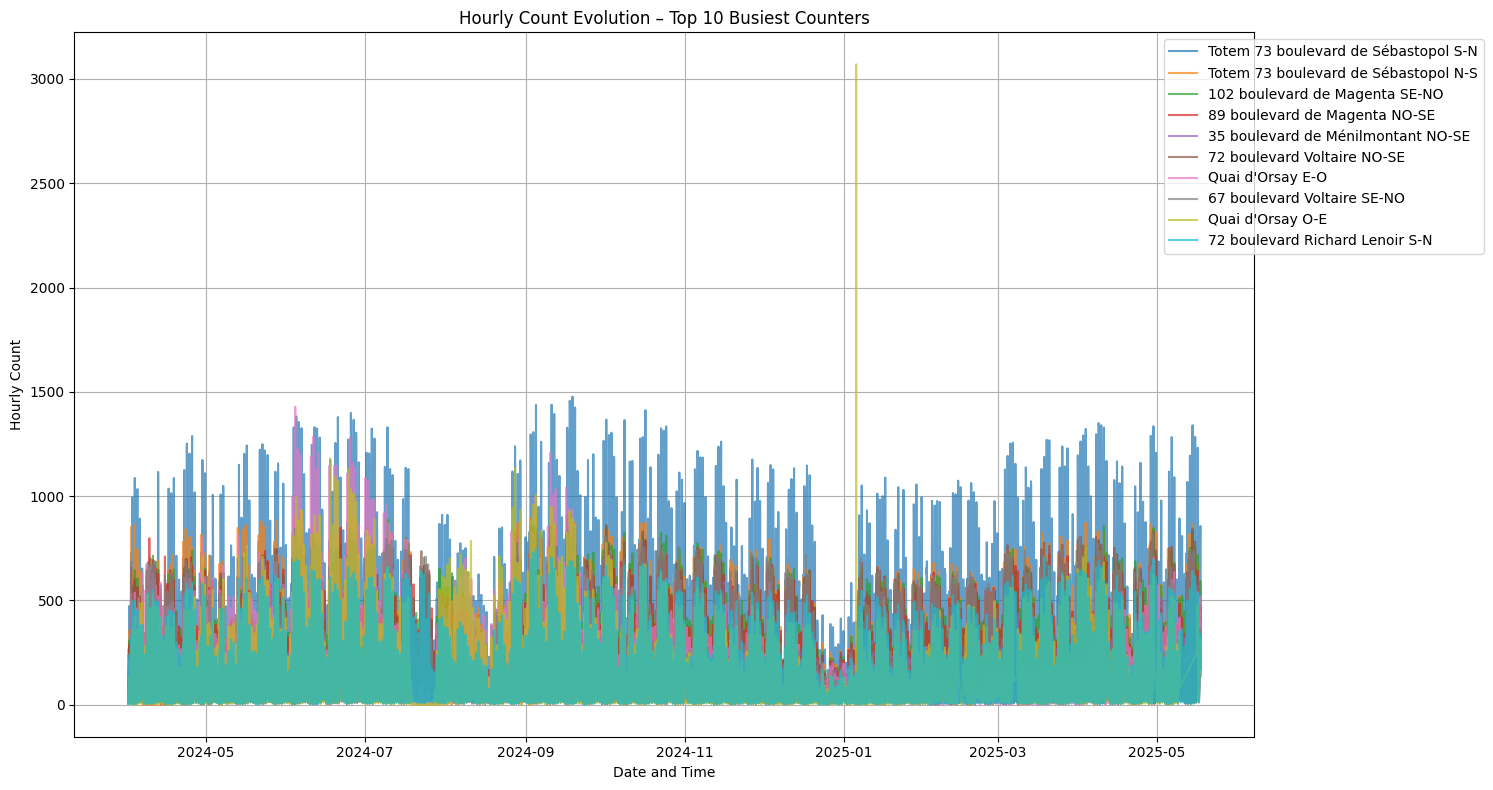

In [18]:
import matplotlib.pyplot as plt

top10 = (
    df_clean.groupby("nom_du_compteur")["comptage_horaire"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

df_top10 = df_clean[df_clean["nom_du_compteur"].isin(top10)]

plt.figure(figsize=(15, 8))

for compteur in top10:
    # Hourly average per date (optionally use .resample('D') to group by day)
    serie = (
        df_top10[df_top10["nom_du_compteur"] == compteur]
        .groupby("date_et_heure_de_comptage")["comptage_horaire"]
        .mean()
        .sort_index()
    )
    plt.plot(serie.index, serie.values, label=compteur, alpha=0.7)

plt.title("Hourly Count Evolution – Top 10 Busiest Counters")
plt.xlabel("Date and Time")
plt.ylabel("Hourly Count")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

### Crowd Detection Based on Hourly Average

This section adds a binary column `Affluence` indicating whether a row represents a crowded period (`1`) or not (`0`).

- The threshold is defined as the **average hourly count** per counter.
- If the hourly count exceeds this threshold, the row is marked as a crowded situation (`Affluence = 1`), otherwise `0`.

This method enables a simple and tailored detection based on each counter's activity level.

In [19]:
# Create a working copy
df_affluence = df_clean.copy()

# Initialize the Affluence column
df_affluence["Affluence"] = 0

for compteur in df_affluence["nom_du_compteur"].unique():
    # Extract count values for this counter
    serie = df_affluence[df_affluence["nom_du_compteur"] == compteur]["comptage_horaire"]
    # Compute threshold
    seuil = serie.mean()
    # Apply crowd condition
    df_affluence.loc[
        (df_affluence["nom_du_compteur"] == compteur) &
        (df_affluence["comptage_horaire"] > seuil),
        "Affluence"
    ] = 1

df_affluence["Affluence"].value_counts()

Affluence
0    555499
1    357462
Name: count, dtype: int64

### Classification Model Training

In this section, we train a `RandomForestClassifier` model to predict the binary variable `Affluence`.

- Features include: hour, day, month, weekday (encoded), and counter ID.
- Data is split into training (80%) and testing (20%) sets using `train_test_split`.
- The model is trained on the training set and used to predict on the test set.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Working copy
df_ml = df_affluence.copy()

# Encode counter name
le = LabelEncoder()
df_ml["Compteur_ID"] = le.fit_transform(df_ml["nom_du_compteur"])

# Encode weekday as integer
df_ml["jour_mois_semaine_ID"] = df_ml["jour_semaine"].astype('category').cat.codes

# Features
features = ["heure", "jour_mois", "mois", "jour_mois_semaine_ID", "Compteur_ID"]
X = df_ml[features]

# Target variable
y = df_ml["Affluence"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[98255 12845]
 [12686 58807]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89    111100
           1       0.82      0.82      0.82     71493

    accuracy                           0.86    182593
   macro avg       0.85      0.85      0.85    182593
weighted avg       0.86      0.86      0.86    182593



### Model Evaluation – Results

**Confusion Matrix:**
- `98255` true negatives (predicted 0, actual 0)
- `58807` true positives (predicted 1, actual 1)
- `12845` false positives (predicted 1, actual 0)
- `12686` false negatives (predicted 0, actual 1)

**Performance Scores:**
- **Accuracy**: 86% (overall prediction success)
- **Precision (Affluence = 1)**: 82%
- **Recall (Affluence = 1)**: 82%
- **F1-score (Affluence = 1)**: 0.82

These results show the model performs well in detecting crowd situations.

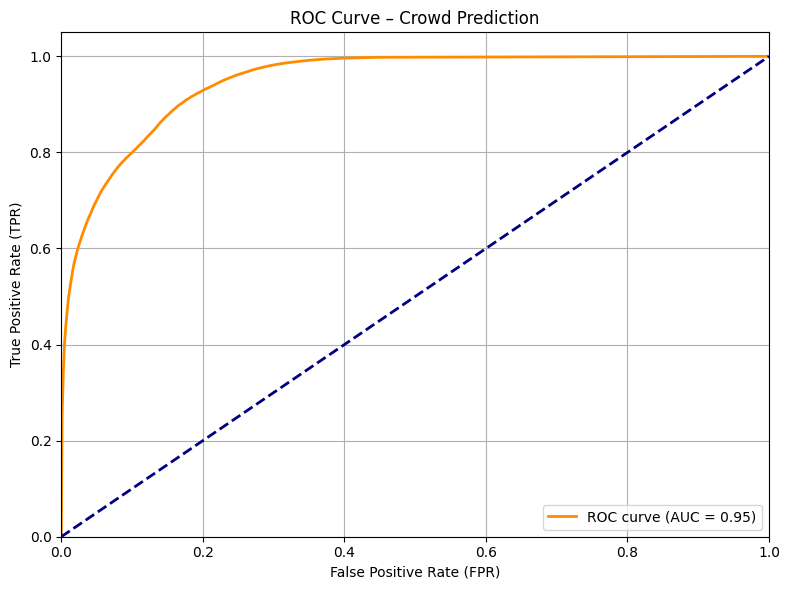

In [24]:
from sklearn.metrics import roc_curve, auc

# Get probabilities for class 1
y_proba = clf.predict_proba(X_test)[:, 1]

# Compute ROC points
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve – Crowd Prediction')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

### ROC Curve – Model Evaluation

The ROC curve illustrates the model's ability to distinguish between `Affluence = 1` and `Affluence = 0`.

- X-axis: **False Positive Rate (FPR)**
- Y-axis: **True Positive Rate (TPR)**
- The orange curve shows the model's performance.
- The dashed diagonal represents random guessing (AUC = 0.5).

**Result:**
- The **Area Under the Curve (AUC)** is **0.95**, indicating excellent class separation.
- The closer the curve is to the top-left corner, the better the model.

This confirms that the model effectively classifies crowd situations.